# Emerging Markets FX analysis

In [376]:
import pandas as pd 
import numpy as np 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

In [377]:
df_original = pd.read_csv('./EM_FX_data_time_series.csv',index_col='Dates')
df_original.head(5)

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER_discount,budget
Dates,,,,,,,
6/20/02,2.8015,1,-3.55,385,18.8514,-0.114198,-3.25
6/21/02,2.8305,1,-3.55,385,21.9522,-0.131145,-3.25
6/24/02,2.7740,1,-3.55,385,20.4583,-0.136943,-3.25
6/25/02,2.8290,1,-3.55,385,20.5171,-0.126762,-3.25
6/26/02,2.8805,1,-3.55,385,20.6130,-0.144215,-3.25


In [378]:
df_original.shape

(4172, 7)

In [180]:
df_original.tail()

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER_discount,budget
Dates,,,,,,,
6/11/18,3.7114,1,-0.4,5981,6.2523,-0.113685,-7.4
6/12/18,3.7201,1,-0.4,5981,6.1535,-0.110470,-7.4
6/13/18,3.7217,1,-0.4,5981,5.9313,-0.117464,-7.4
6/14/18,3.8062,1,-0.4,5981,6.3584,-0.109305,-7.4
6/15/18,3.7296,1,-0.4,5981,6.4740,-0.113787,-7.4


Basic EDA:

In [181]:
df_original.describe()

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER_discount,budget
count,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000
mean,2.480028,0.432167,-1.326064,2498.139262,11.067416,0.012326,-4.318087
std,0.655408,0.495437,1.885970,1990.913442,4.204925,0.110455,2.433261
min,1.539100,0.000000,-4.370000,-4067.000000,-6.870000,-0.328794,-10.310000
25%,1.925900,0.000000,-3.050000,1316.000000,8.063600,-0.076465,-5.160000
50%,2.279700,0.000000,-1.420000,2623.000000,10.540700,0.038323,-3.160000
75%,3.068725,1.000000,0.650000,3690.000000,13.558050,0.089387,-2.770000
max,4.178300,1.000000,1.830000,7661.000000,24.450000,0.288308,-1.610000


### Test Lag from 1 to 21
---

In [379]:
# to hold results for training and testing
training = []
testing = []

for i in range(1,22):
    ## data preparation
    # shift by i
    df_original['BRL_FX_Spot_1d']=df_original['BRL_FX_Spot'].shift(i)
    df_original['50d_200d_cross_1d']=df_original['50d_200d_cross'].shift(i)
    df_original['CA_1d']=df_original['CA'].shift(i)
    df_original['TB_1d']=df_original['TB'].shift(i)
    df_original['rate_1d']=df_original['rate'].shift(i)
    df_original['REER_discount_1d']=df_original['REER_discount'].shift(i)
    df_original['budget_1d']=df_original['budget'].shift(i)
    #remove all na
    df=df_original.dropna(axis=0, how='any')
    # drop old cols
    df=df.drop(['50d_200d_cross','CA','TB','rate','REER_discount','budget'],axis=1)
    
    ## training preparation
    # separate X and Y
    y=df['BRL_FX_Spot']
    X=df.drop('BRL_FX_Spot', axis=1) 
    
    # train and test splitting by order
    split=int(round(X.shape[0]*0.7,0))
    end=int(round(X.shape[0],0))+1
    X_train=X.iloc[0:split]
    y_train=y.iloc[0:split]
    X_test=X.iloc[split:end]
    y_test=y.iloc[split:end]
   
    ## training
    # perform linear fitting
    lr_model1 = LinearRegression()
    lr_model1.fit(X_train,y_train)
    
    ## generate results

    # generate score for training and testing
    train_score = lr_model1.score(X_train,y_train)
    test_score = lr_model1.score(X_test,y_test)
    training.append(train_score)
    testing.append(test_score)
    
    # temp print result
    print("For {0} lags, the training score is {1} and the testing score is {2}".format(i, train_score, test_score ))

For 1 lags, the training score is 0.9974320710059862 and the testing score is 0.9959038592694834
For 2 lags, the training score is 0.9948071092351554 and the testing score is 0.9924650259373526
For 3 lags, the training score is 0.9927398688921496 and the testing score is 0.989532914728047
For 4 lags, the training score is 0.9905671290605927 and the testing score is 0.9865838125585882
For 5 lags, the training score is 0.9882818674535416 and the testing score is 0.9835234561699845
For 6 lags, the training score is 0.9860932283940425 and the testing score is 0.9810943920506039
For 7 lags, the training score is 0.9842439987102265 and the testing score is 0.9784621142291579
For 8 lags, the training score is 0.9824253458694958 and the testing score is 0.9756726450127196
For 9 lags, the training score is 0.9806810701319868 and the testing score is 0.9724890688816661
For 10 lags, the training score is 0.9789314116519018 and the testing score is 0.9695417179966677
For 11 lags, the training scor

In [380]:
df_original.head(5)

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER_discount,budget,BRL_FX_Spot_1d,50d_200d_cross_1d,CA_1d,TB_1d,rate_1d,REER_discount_1d,budget_1d
Dates,,,,,,,,,,,,,,
6/20/02,2.8015,1,-3.55,385,18.8514,-0.114198,-3.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/21/02,2.8305,1,-3.55,385,21.9522,-0.131145,-3.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/24/02,2.7740,1,-3.55,385,20.4583,-0.136943,-3.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/25/02,2.8290,1,-3.55,385,20.5171,-0.126762,-3.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/26/02,2.8805,1,-3.55,385,20.6130,-0.144215,-3.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## The end of Lag test: need to perform TS.
---

### Linear model on return

In [414]:
df_original = pd.read_csv('./EM_FX_data_time_series.csv',index_col='Dates')
df_original.head(5)

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER_discount,budget
Dates,,,,,,,
6/20/02,2.8015,1,-3.55,385,18.8514,-0.114198,-3.25
6/21/02,2.8305,1,-3.55,385,21.9522,-0.131145,-3.25
6/24/02,2.7740,1,-3.55,385,20.4583,-0.136943,-3.25
6/25/02,2.8290,1,-3.55,385,20.5171,-0.126762,-3.25
6/26/02,2.8805,1,-3.55,385,20.6130,-0.144215,-3.25


In [415]:
w=7

i=21
df=df_original.copy()
df['BRL_FX_Spot_ret'] = np.log(1/df_original['BRL_FX_Spot']).diff(w)  
#df_original['BRL_FX_Spot_ret'] = (1/df_original['BRL_FX_Spot']).diff(i).iloc[i:] 
#df['50d_200d_cross_lgd']=df_original['50d_200d_cross'].shift(i)
df['CA_diff_lgd']=df_original['CA'].diff(i).shift(i)
df['TB_1gd']=df_original['TB'].diff(i).shift(i)
df['rate_diff_lgd']=df_original['rate'].diff(i).shift(i)
df['REER_discount_lgd']=df_original['REER_discount'].diff(i).shift(i)
df['budget_diff_lgd']=df_original['budget'].diff(i).shift(i)
df.head(5)

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER_discount,budget,BRL_FX_Spot_ret,CA_diff_lgd,TB_1gd,rate_diff_lgd,REER_discount_lgd,budget_diff_lgd
Dates,,,,,,,,,,,,,
6/20/02,2.8015,1,-3.55,385,18.8514,-0.114198,-3.25,NaN,NaN,NaN,NaN,NaN,NaN
6/21/02,2.8305,1,-3.55,385,21.9522,-0.131145,-3.25,NaN,NaN,NaN,NaN,NaN,NaN
6/24/02,2.7740,1,-3.55,385,20.4583,-0.136943,-3.25,NaN,NaN,NaN,NaN,NaN,NaN
6/25/02,2.8290,1,-3.55,385,20.5171,-0.126762,-3.25,NaN,NaN,NaN,NaN,NaN,NaN
6/26/02,2.8805,1,-3.55,385,20.6130,-0.144215,-3.25,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
#remove all na
df.dropna(axis=0, how='any',inplace=True)
df.head(5)

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER_discount,budget,BRL_FX_Spot_ret,CA_diff_lgd,TB_1gd,rate_diff_lgd,REER_discount_lgd,budget_diff_lgd
Dates,,,,,,,,,,,,,
8/19/02,3.1010,1,-3.28,1206,6.3917,-0.177872,-3.55,-0.077761,0.27,300.0,-9.3247,-0.033336,-0.3
8/20/02,3.0985,1,-3.28,1206,6.3917,-0.177610,-3.55,-0.065346,0.27,300.0,-14.4844,-0.016620,-0.3
8/21/02,3.0810,1,-3.28,1206,9.6574,-0.175809,-3.55,-0.052815,0.27,300.0,-14.2020,-0.012414,-0.3
8/22/02,3.1395,1,-3.28,1206,6.8594,-0.196887,-3.55,-0.064464,0.27,300.0,-14.5186,-0.029776,-0.3
8/23/02,3.1080,1,-3.28,1206,7.1914,-0.176468,-3.55,-0.036868,0.27,300.0,-14.8916,-0.030703,-0.3


In [418]:

#drop old cols
df=df.drop(['BRL_FX_Spot','50d_200d_cross','CA','TB','rate','REER_discount','budget'],axis=1)
#replace zeros by na and then impute using pad i.e. previous value
df.head(5)


,BRL_FX_Spot_ret,CA_diff_lgd,TB_1gd,rate_diff_lgd,REER_discount_lgd,budget_diff_lgd
Dates,,,,,,
8/19/02,-0.077761,0.27,300.0,-9.3247,-0.033336,-0.3
8/20/02,-0.065346,0.27,300.0,-14.4844,-0.016620,-0.3
8/21/02,-0.052815,0.27,300.0,-14.2020,-0.012414,-0.3
8/22/02,-0.064464,0.27,300.0,-14.5186,-0.029776,-0.3
8/23/02,-0.036868,0.27,300.0,-14.8916,-0.030703,-0.3


In [419]:
## training preparation
# separate X and Y
y=df['BRL_FX_Spot_ret']
X=df.drop('BRL_FX_Spot_ret', axis=1) 


In [420]:

# train and test splitting by order
split=int(round(X.shape[0]*0.7,0))
end=int(round(X.shape[0],0))+1
X_train=X.iloc[0:split]
y_train=y.iloc[0:split]
X_test=X.iloc[split:end]
y_test=y.iloc[split:end]

In [421]:
## training
# perform linear fitting
lr_model1 = LinearRegression()
lr_model1.fit(X_train,y_train)

## generate results

# generate score for training and testing
train_score = lr_model1.score(X_train,y_train)
test_score = lr_model1.score(X_test,y_test)

print("The training score is {0} and the testing score is {1}".format(train_score, test_score ))

The training score is 0.023546235422732265 and the testing score is -0.15730641781641896


### Testing different lags

In [413]:
df=df_original.copy()


for i in range(1,30):
   
    df['BRL_FX_Spot_ret'] = np.log(1/df_original['BRL_FX_Spot']).diff(i).iloc[i:]  
    #df_original['BRL_FX_Spot_ret'] = (1/df_original['BRL_FX_Spot']).diff(i).iloc[i:] 
    #df['50d_200d_cross_lgd']=df_original['50d_200d_cross'].shift(i)
    df['CA_diff_lgd']=df_original['CA'].diff(i).shift(i)
    df['TB_1gd']=df_original['TB'].diff(i).shift(i)
    df['rate_diff_lgd']=df_original['rate'].diff(i).shift(i)
    df['REER_discount_lgd']=df_original['REER_discount'].diff(i).shift(i)
    df['budget_diff_lgd']=df_original['budget'].diff(i).shift(i)

    #remove all na
    df.dropna(axis=0, how='any',inplace=True)

    #drop old cols
    df=df.drop(['BRL_FX_Spot','50d_200d_cross','CA','TB','rate','REER_discount','budget'],axis=1)

    ## training preparation
    # separate X and Y
    y=df['BRL_FX_Spot_ret']
    X=df.drop('BRL_FX_Spot_ret', axis=1) 


    # train and test splitting by order
    split=int(round(X.shape[0]*0.7,0))
    end=int(round(X.shape[0],0))+1
    X_train=X.iloc[0:split]
    y_train=y.iloc[0:split]
    X_test=X.iloc[split:end]
    y_test=y.iloc[split:end]


    ## training
    # perform linear fitting
    lr_model1 = LinearRegression()
    lr_model1.fit(X_train,y_train)

    ## generate results

    # generate score for training and testing
    train_score = lr_model1.score(X_train,y_train)
    test_score = lr_model1.score(X_test,y_test)
    training.append(train_score)
    testing.append(test_score)

    print("For {0} lags, the training score is {1} and the testing score is {2}".format(i, train_score, test_score ))


For 1 lags, the training score is 0.0038050795937293325 and the testing score is 0.002254524642119504


ValueError: labels ['BRL_FX_Spot' '50d_200d_cross' 'CA' 'TB' 'rate' 'REER_discount' 'budget'] not contained in axis

# VAR model
---

In [108]:
# import models
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

In [121]:
# import data
df_var = pd.read_csv('./EM_FX_data_time_series.csv',index_col='Dates')
df_var.head(5)

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER_discount,budget
Dates,,,,,,,
6/20/02,2.8015,1,-3.55,385,18.8514,-0.114198,-3.25
6/21/02,2.8305,1,-3.55,385,21.9522,-0.131145,-3.25
6/24/02,2.7740,1,-3.55,385,20.4583,-0.136943,-3.25
6/25/02,2.8290,1,-3.55,385,20.5171,-0.126762,-3.25
6/26/02,2.8805,1,-3.55,385,20.6130,-0.144215,-3.25


In [122]:
# log return for 'BRL_FX_Spot'
df_var['BRL_FX_Spot_ret'] = np.log(df_var['BRL_FX_Spot']).diff().iloc[1:]  
# break down for reference
    # step1 = np.log(df_var['BRL_FX_Spot'])
    # step2 = step1.diff()
    # step3 = step2.iloc[1:]
df_var['BRL_FX_Spot_ret'].dropna() 

In [123]:
df_var['BRL_FX_Spot_ret'].head(5)

Dates
6/20/02         NaN
6/21/02    0.010298
6/24/02   -0.020163
6/25/02    0.019633
6/26/02    0.018041
Name: BRL_FX_Spot_ret, dtype: float64

In [125]:
df_var.dropna(axis=0, how='any',inplace=True)

In [126]:
df_var.head(5)

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER_discount,budget,BRL_FX_Spot_ret
Dates,,,,,,,,
6/21/02,2.8305,1,-3.55,385,21.9522,-0.131145,-3.25,0.010298
6/24/02,2.7740,1,-3.55,385,20.4583,-0.136943,-3.25,-0.020163
6/25/02,2.8290,1,-3.55,385,20.5171,-0.126762,-3.25,0.019633
6/26/02,2.8805,1,-3.55,385,20.6130,-0.144215,-3.25,0.018041
6/27/02,2.8310,1,-3.55,385,18.7997,-0.150601,-3.25,-0.017334


## Linear Regression

In [342]:
## LinearRegression model with only numeric predictors
## SalePrice as the target

lr_model1 = LinearRegression()
lr_model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [343]:
## Let us look at the (single) variable coefficient and the intercept
lr_model1.intercept_

0.003600528849422081

In [344]:
list(zip(X_train.columns,lr_model1.coef_))

[('50d_200d_cross_lgd', -0.0015850308541282237),
 ('CA_diff_lgd', 0.0014966626411016834),
 ('TB_1gd', 1.3233075219298295e-06),
 ('rate_diff_lgd', 0.0014084118029978408),
 ('REER_discount_lgd', 0.039178753284984824),
 ('budget_diff_lgd', -0.019278656928800222)]

In [345]:
# Getting predictions of the model on the test set

test_set_pred1 = lr_model1.predict(X_test)
test_set_pred1

array([-0.00419347, -0.00391793, -0.00447315, ..., -0.01838777,
       -0.01852147, -0.01883643])

In [346]:
X_test.loc['6/15/18']

50d_200d_cross_lgd      1.000000
CA_diff_lgd             0.080000
TB_1gd                933.000000
rate_diff_lgd           0.355300
REER_discount_lgd      -0.043212
budget_diff_lgd         1.090000
Name: 6/15/18, dtype: float64

In [347]:
y_test.loc['6/15/18']

-0.04564197177838958

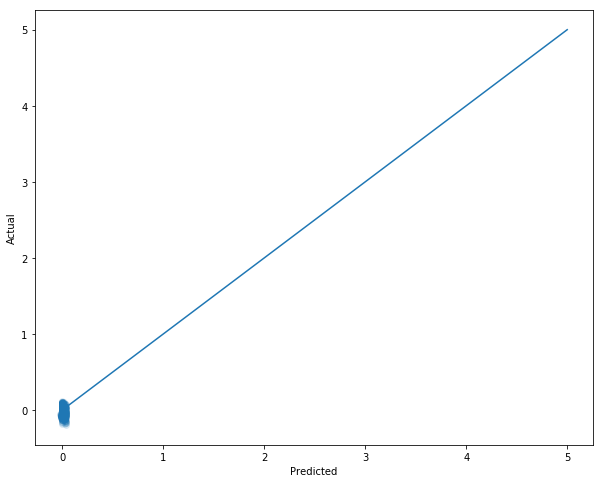

In [348]:
## Plotting the actual vs expected house price (along with the line x=y for reference)
plt.figure(figsize=(10,8))
plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,5,1000),np.linspace(0,5,1000))
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [349]:
lr_model1.score(X_train,y_train)

0.019320642507519414

In [350]:
lr_model1.score(X_test,y_test)

-0.1704131415340291

### Tree methods

In [370]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [371]:
regr.predict(X_test)

array([ 0.00328878,  0.00328878,  0.00495069, ..., -0.07366319,
       -0.05104285, -0.05104285])

In [372]:
regr.score(X_test, y_test)

-0.8932048262384671

In [373]:
regr.feature_importances_

array([0.02612042, 0.13407774, 0.21339476, 0.20518812, 0.22710592,
       0.19411304])